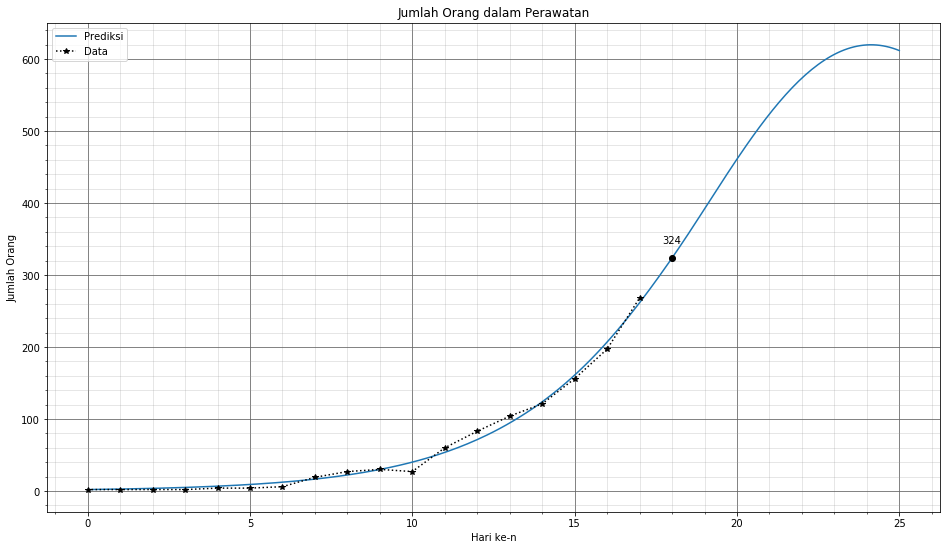

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# https://docs.google.com/spreadsheets/d/1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw/htmlview?usp=sharing#
infected = [2, 2, 2, 2, 4, 4, 6, 19, 27, 30, 27, 60, 83, 104, 121, 156, 197, 268]
day = len(infected)
N = 10000


def plotSIR(beta, gamma):   
    def SIR(t,y):
        S, I, R = y
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    sol = solve_ivp(SIR, [0, 7+day], [N, 2, 0], t_eval=np.arange(0, 7+day+.1, 0.1))

    fig = plt.figure(figsize=(16, 9))
    plt.plot(sol.t,sol.y[1])
    plt.plot(np.arange(0, day), infected, "k*:")

    predict = sol.y[1][::10][day]
    plt.plot(day, predict, 'ko')
    plt.annotate(str(int(round(predict))), (day-0.3, predict+20))

    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.3)
    plt.grid(b=True, which='major', color='#666666', linestyle='-')

    plt.title('Jumlah Orang dalam Perawatan')
    plt.xlabel('Hari ke-n')
    plt.ylabel('Jumlah Orang')
    plt.legend(["Prediksi", "Data"])
    plt.savefig('line_plot.png')  
    
    
def SSE(p):
    beta, gamma = p
    def SIR(t,y):
        S, I, R = y
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    sol = solve_ivp(SIR, [0, day], [N, 2, 0], t_eval=np.arange(0, day+.1, 0.1))
    return(sum((sol.y[1][:-1:10]-infected)**2))


msol = minimize(SSE, [0.001, 1], method='Nelder-Mead')
beta, gamma = msol.x
plotSIR(beta, gamma)